In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
laptop_data = pd.read_excel(r'C:\Users\Urvashi\Desktop\Urvashi\Career\Study Notes\All_Notes\Projects\7-Data_Science_Projects\1-Data Analysis\4-Laptop Price\laptop_price.xlsx')

In [4]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
laptop_ID           1303 non-null int64
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.4+ KB


In [6]:
laptop_data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
laptop_data.shape

(1303, 13)

In [8]:
laptop_data.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [9]:
laptop_data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

### Data Cleaning

In [10]:
laptop_data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [11]:
laptop_data.duplicated().sum()

0

### What is the average laptop price based on operating system?

In [12]:
laptop_data['Price_INR'] = laptop_data['Price_euros']*90

In [13]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0


In [14]:
laptop_data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

In [130]:
laptop_data[['OpSys', 'Price_INR']].describe()

,Price_INR
count,1303.000000
mean,101131.829240
std,62910.813828
min,15660.000000
25%,53910.000000
50%,87930.000000
75%,133909.200000
max,548910.000000


In [15]:
laptop_data[laptop_data['OpSys'] =='Windows 10']['Price_INR'].values.mean()

105132.55298507464

In [16]:
laptop_data[laptop_data['OpSys'] =='Linux']['Price_INR'].values.mean()

55536.19838709678

In [17]:
laptop_data[laptop_data['OpSys'] =='Windows 7']['Price_INR'].values.mean()

151798.62

In [18]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0


### Which company has the highest average laptop price?

In [21]:
brands = laptop_data['Company'].unique()

In [22]:
brands

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [23]:
brands_average_price = []
for i in brands:
    brands_average_price.append([i, laptop_data[laptop_data['Company']==i]['Price_INR'].mean()])

In [24]:
brands_average_price

[['Apple', 140777.8714285714],
 ['HP', 96099.73686131391],
 ['Acer', 56409.82427184466],
 ['Asus', 99375.2430379747],
 ['Dell', 106746.20909090913],
 ['Lenovo', 97774.60000000002],
 ['Chuwi', 28286.7],
 ['MSI', 155601.73333333334],
 ['Microsoft', 145107.75],
 ['Toshiba', 114103.125],
 ['Huawei', 128160.0],
 ['Xiaomi', 102011.625],
 ['Vero', 19568.25],
 ['Razer', 301152.85714285716],
 ['Mediacom', 26550.0],
 ['Samsung', 127210.0],
 ['Google', 150990.0],
 ['Fujitsu', 65610.0],
 ['LG', 188910.0]]

In [25]:
max_value = max(brands_average_price, key= lambda x: x[1])
max_value

['Razer', 301152.85714285716]

In [26]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0


In [27]:
laptop_data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Core i5 7300U 2.6GHz                14
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i7 7600U 2.8GHz                13
Intel Core i5 6300U 2.4GHz                11
Intel Pentium Quad Core N3710 1.6GHz      11
Intel Celeron Dual Core N3050 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core

### What is the most common screen resolution across all laptops in the dataset?

In [28]:
laptop_data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [29]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0


In [30]:
laptop_data[['Inches', 'Price_INR']].describe()

,Inches,Price_INR
count,1303.000000,1303.000000
mean,15.017191,101131.829240
std,1.426304,62910.813828
min,10.100000,15660.000000
25%,14.000000,53910.000000
50%,15.600000,87930.000000
75%,15.600000,133909.200000
max,18.400000,548910.000000


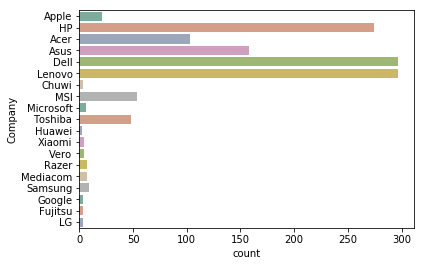

In [31]:
ax = sns.countplot(y='Company', data = laptop_data, palette="Set2", saturation=0.5)
plt.show()

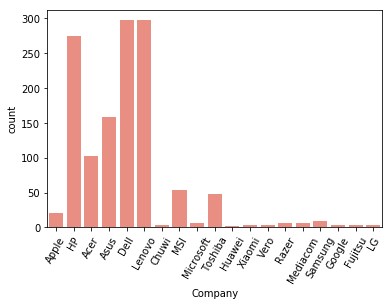

In [32]:
ax = sns.countplot(x='Company', data = laptop_data, color='salmon')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

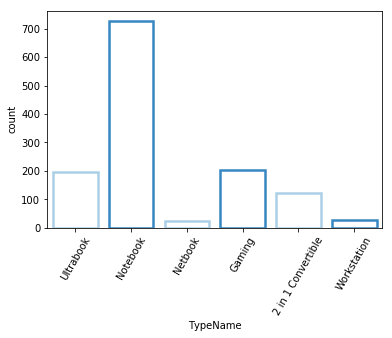

In [33]:
ax = sns.countplot(x='TypeName', data = laptop_data, facecolor=(0, 0, 0, 0), linewidth=2.5, edgecolor=sns.color_palette("Blues", 2))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [34]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0


### Is there a correlation between laptop weight and price?

In [41]:
laptop_data['Weight Values'] = laptop_data['Weight'].str.replace('kg', '').astype(float)

In [42]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR,Weight Values
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1,1.37
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6,1.34
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0,1.86
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5,1.83
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0,1.37


In [43]:
# Top 10 laptop weights
laptop_weight = laptop_data['Weight Values'].sort_values(ascending=False)[:10]
weight = laptop_weight.values
weight

array([4.7 , 4.6 , 4.6 , 4.6 , 4.6 , 4.5 , 4.42, 4.42, 4.42, 4.42])

In [45]:
laptop_price = laptop_data.loc[laptop_weight.index]['Price_INR']

In [46]:
laptop_price

238     350100.0
1048    206099.1
577     239670.0
1081    291600.0
1116    247499.1
585     211410.0
530     271149.3
780     322992.0
758     258209.1
456     184140.0
Name: Price_INR, dtype: float64

In [48]:
prices = laptop_price.values
prices

array([350100. , 206099.1, 239670. , 291600. , 247499.1, 211410. ,
       271149.3, 322992. , 258209.1, 184140. ])

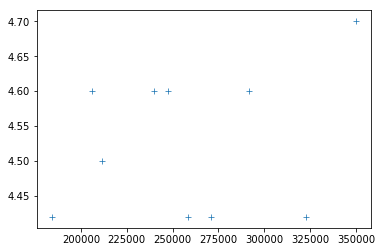

In [69]:
sns.scatterplot(x=prices, y=weight, data=laptop_data, marker='+')

In [70]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR,Weight Values
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1,1.37
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6,1.34
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0,1.86
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5,1.83
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0,1.37


### What is the relationship between the RAM and the price of the laptops

In [79]:
laptop_data['Ram Value'] = laptop_data['Ram'].str.replace("GB", "").astype(float)

In [80]:
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_INR,Weight Values,Ram Value
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,120572.1,1.37,8.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,80904.6,1.34,8.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,51750.0,1.86,8.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,228370.5,1.83,16.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,162324.0,1.37,8.0


In [82]:
# laptop_data['Ram Value'].sort_values(ascending=False)

1066    64.0
177     32.0
968     32.0
723     32.0
901     32.0
659     32.0
329     32.0
491     32.0
650     32.0
841     32.0
1081    32.0
830     32.0
238     32.0
577     32.0
610     32.0
780     32.0
196     32.0
972     32.0
494     24.0
517     24.0
438     24.0
391     16.0
939     16.0
816     16.0
224     16.0
818     16.0
226     16.0
1109    16.0
562     16.0
232     16.0
        ... 
934      4.0
932      4.0
386      4.0
931      4.0
967      4.0
930      4.0
381      4.0
929      4.0
1292     2.0
1296     2.0
1300     2.0
409      2.0
1268     2.0
1286     2.0
31       2.0
1168     2.0
1272     2.0
626      2.0
1215     2.0
745      2.0
314      2.0
1264     2.0
290      2.0
1278     2.0
515      2.0
346      2.0
1282     2.0
637      2.0
20       2.0
1041     2.0
Name: Ram Value, Length: 1303, dtype: float64

In [94]:
price = laptop_data['Price_INR'].sort_values(ascending=False)[:30]
price

196     548910.0
830     494910.0
610     440910.0
749     395010.0
1066    357750.0
1136    355446.0
238     350100.0
723     329346.0
780     322992.0
1231    314910.0
744     296910.0
1081    291600.0
955     283860.0
968     283410.0
659     283263.3
911     279000.0
841     276560.1
204     274950.0
530     271149.3
563     269910.0
247     269910.0
517     267120.0
1017    267120.0
1103    260910.0
778     260910.0
297     259637.4
758     258209.1
17      257220.0
190     254160.0
685     253237.5
Name: Price_INR, dtype: float64

In [95]:
price_desc = price.values

In [96]:
price_desc

array([548910. , 494910. , 440910. , 395010. , 357750. , 355446. ,
       350100. , 329346. , 322992. , 314910. , 296910. , 291600. ,
       283860. , 283410. , 283263.3, 279000. , 276560.1, 274950. ,
       271149.3, 269910. , 269910. , 267120. , 267120. , 260910. ,
       260910. , 259637.4, 258209.1, 257220. , 254160. , 253237.5])

In [99]:
ram_values = laptop_data.loc[price.index]['Ram Value']
ram_values

196     32.0
830     32.0
610     32.0
749     16.0
1066    64.0
1136     8.0
238     32.0
723     32.0
780     32.0
1231    16.0
744     16.0
1081    32.0
955     16.0
968     32.0
659     32.0
911      8.0
841     32.0
204     16.0
530     16.0
563      8.0
247     16.0
517     24.0
1017    16.0
1103     8.0
778     16.0
297     16.0
758     16.0
17      16.0
190     16.0
685     16.0
Name: Ram Value, dtype: float64

In [100]:
price_acc_ram = ram_values.values

In [101]:
price_acc_ram

array([32., 32., 32., 16., 64.,  8., 32., 32., 32., 16., 16., 32., 16.,
       32., 32.,  8., 32., 16., 16.,  8., 16., 24., 16.,  8., 16., 16.,
       16., 16., 16., 16.])

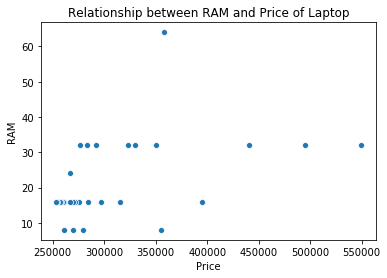

In [114]:
sns.scatterplot(x=price_desc, y=price_acc_ram, data=laptop_data)
plt.title('Relationship between RAM and Price of Laptop')          # Based on Top 30 high priced Laptops
plt.xlabel('Price')
plt.ylabel('RAM')
plt.show()

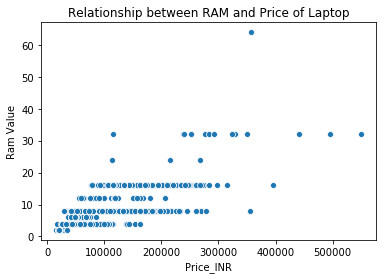

In [117]:
sns.scatterplot(x=laptop_data['Price_INR'], y=laptop_data['Ram Value'])
plt.title('Relationship between RAM and Price of Laptop')  
plt.show()

### Which laptop has the most RAM?

In [143]:
laptop_data.loc[laptop_data['Ram Value'].sort_values(ascending=False).index[0]]

laptop_ID                                  1081
Company                                    Asus
Product                              ROG G701VO
TypeName                                 Gaming
Inches                                     17.3
ScreenResolution    IPS Panel Full HD 1920x1080
Cpu                 Intel Core i7 6820HK 2.7GHz
Ram                                        64GB
Memory                                  1TB SSD
Gpu                     Nvidia GeForce GTX 980 
OpSys                                Windows 10
Weight                                   3.58kg
Price_euros                                3975
Price_INR                                357750
Weight Values                              3.58
Ram Value                                    64
Name: 1066, dtype: object

### Conclusion from the Laptop dataset

* The dataset contains information on 1303 laptops, with an average size of approximately 15 inches and an average price of 1124 Euros

* The smallest laptop size in the dataset is around 10 inches and is priced at 174 Euros, while the largest size is 18.4 inches and is priced at 6099 Euros

* The brand 'Razer' has the highest average laptop price at Rs 301153, followed by Apple with an average price of Rs 140778

* Full HD 1920x1080 is the most common screen resolution among all laptops, with 507 laptops having this resolution. The next most common resolution is 1366x768, with 281 laptops

* The plot shows a positive correlation between laptop weight and price, indicating that heavier laptops tend to be more expensive. As the weight of the laptops increases beyond 3.5 kg, the prices also tend to increase

* For the top 30 high-priced laptops, there is no clear correlation between the RAM and the price of the laptops. The RAM capacity varies for laptops at different price points

* The laptop with the most RAM is the Asus ROG G701VO, with 64GB of RAM